In [7]:
# =====================================================
# JURNAL PART 1: The First Encounter (Setup & Cleaning)
# =====================================================


# Narasi:
# Saya memulai investigasi dengan memuat dataset cuaca jangka panjang.
# Kolom waktu masih berupa string sehingga perlu dikonversi ke datetime
# dan dijadikan sebagai index agar analisis time series valid.


import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller


# Load dataset (sesuaikan path jika di Colab)
df = pd.read_csv('cleaned_weather.csv')


# Konversi kolom waktu ke datetime (gunakan kolom date jika tersedia)
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)


# Cek missing values
missing = df.isnull().sum()
print(missing)


# Interpolasi jika ada missing values
df.interpolate(method='time', inplace=True)

p           0
T           0
Tpot        0
Tdew        0
rh          0
VPmax       0
VPact       0
VPdef       0
sh          0
H2OC        0
rho         0
wv          0
max. wv     0
wd          0
rain        0
raining     0
SWDR        0
PAR         0
max. PAR    0
Tlog        0
dtype: int64


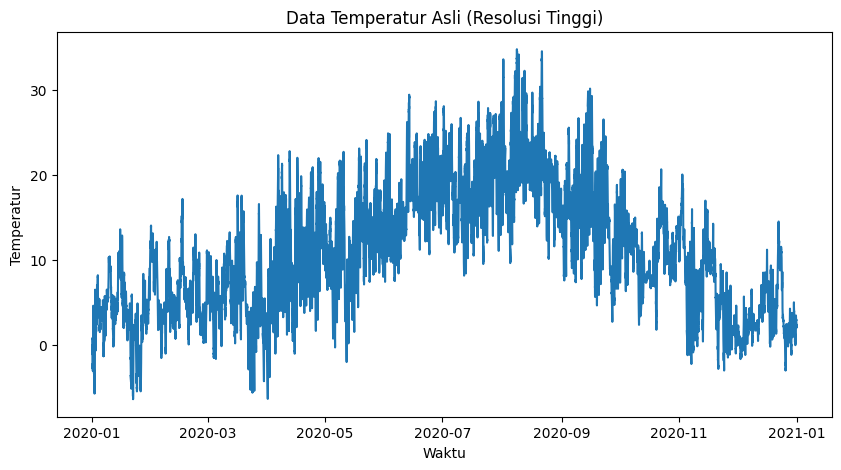

C:\Users\ELITEBOOK 830 G6\AppData\Local\Temp\ipykernel_17132\1011782260.py:21: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df['T'].resample('M').mean()


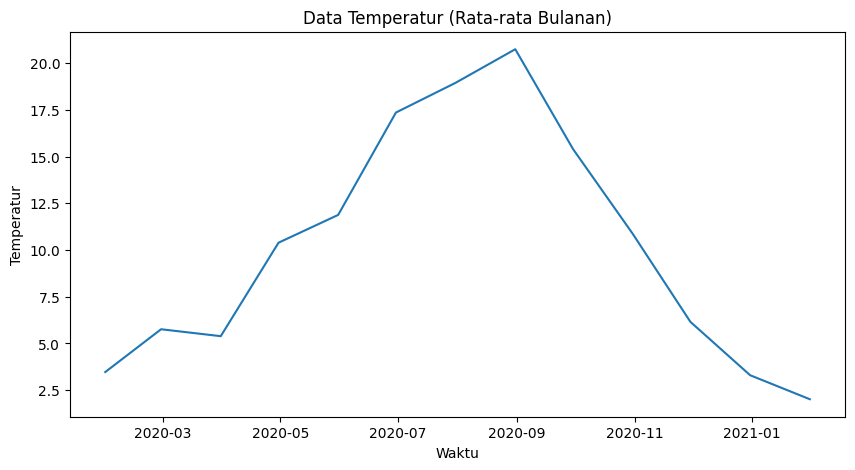

In [8]:
# =====================================================
# JURNAL PART 2: Visual Inspection (Melihat Wajah Sistem)
# =====================================================


# Narasi:
# Grafik awal menunjukkan data sangat noisy karena resolusi 10 menit.
# Untuk melihat pola jangka panjang, dilakukan resampling bulanan.


# Pilih satu variabel, misalnya temperatur (T)
plt.figure(figsize=(10,5))
plt.plot(df['T'])
plt.title('Data Temperatur Asli (Resolusi Tinggi)')
plt.xlabel('Waktu')
plt.ylabel('Temperatur')
plt.show()


# Resampling bulanan
df_monthly = df['T'].resample('M').mean()


plt.figure(figsize=(10,5))
plt.plot(df_monthly)
plt.title('Data Temperatur (Rata-rata Bulanan)')
plt.xlabel('Waktu')
plt.ylabel('Temperatur')
plt.savefig("plot_temperatur_asli.png", dpi=200, bbox_inches="tight")
plt.savefig("plot__temperatur_bulanan.png", dpi=200, bbox_inches="tight")

plt.show()

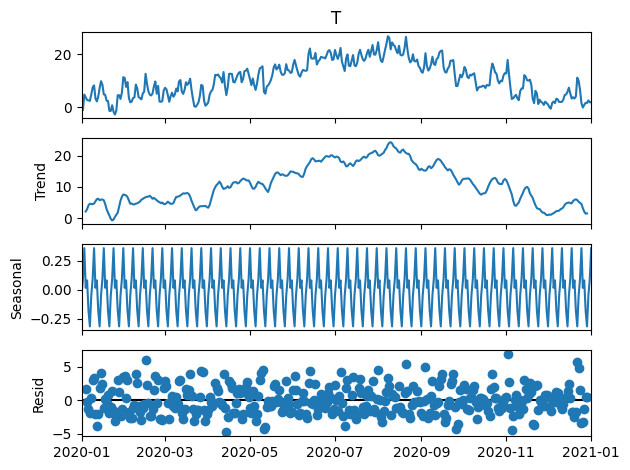

In [9]:


# =====================================================
# JURNAL PART 3: Decomposing the Pattern (Bedah Komponen)
# =====================================================


# Narasi:
# Dekomposisi dilakukan untuk memisahkan tren, musiman, dan residual.


# Resampling harian
df_daily = df['T'].resample('D').mean()

# Dekomposisi musiman (mingguan)
result = seasonal_decompose(
    df_daily.dropna(),
    model='additive',
    period=7
)

result.plot()
plt.savefig("plot_decompose.png", dpi=200, bbox_inches="tight")
plt.show()


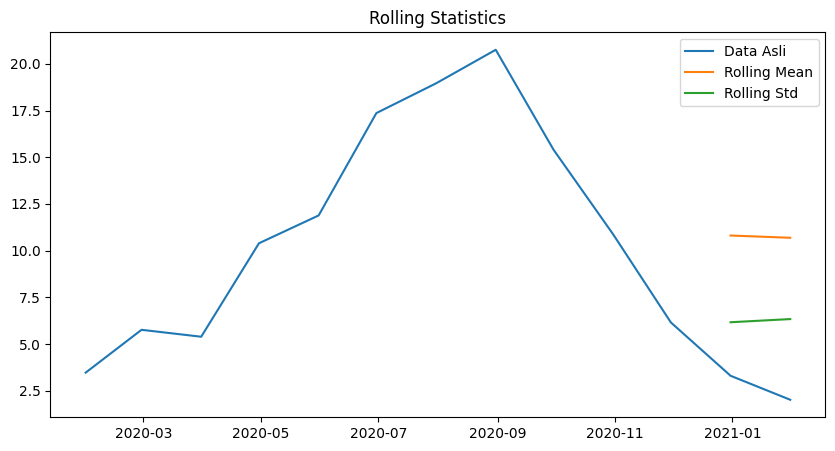

ADF Statistic: -3.5225144190274214
p-value: 0.007427356216006572


In [10]:
# =====================================================
# JURNAL PART 4: Statistical Health Check (Diagnosis Stasioneritas)
# =====================================================


# Narasi:
# Rolling mean dan standar deviasi digunakan untuk melihat kestabilan statistik.


rolling_mean = df_monthly.rolling(window=12).mean()
rolling_std = df_monthly.rolling(window=12).std()


plt.figure(figsize=(10,5))
plt.plot(df_monthly, label='Data Asli')
plt.plot(rolling_mean, label='Rolling Mean')
plt.plot(rolling_std, label='Rolling Std')
plt.legend()
plt.title('Rolling Statistics')
plt.savefig("plot_rolling_stats.png", dpi=200, bbox_inches="tight")
plt.show()


# Uji Augmented Dickey-Fuller (ADF)
adf_test = adfuller(df_monthly.dropna())
print('ADF Statistic:', adf_test[0])
print('p-value:', adf_test[1])


# Kesimpulan:
# Jika p-value > 0.05 maka data tidak stasioner dan perlu transformasi lanjutan.